In [50]:
import networkx as nx

G = nx.Graph()

In [51]:
G.add_nodes_from([
    ("A", {"longitude": 0.0, "latitude": 0.0}),
    ("B", {"longitude": 2.0, "latitude": 4.0}),
    ("C", {"longitude": 3.0, "latitude": 2.0}),
    ("D", {"longitude": 5.0, "latitude": 0}),
    ("E", {"longitude": 6.0, "latitude": 2.0}),
    ("F", {"longitude": 2.0, "latitude": -1.0}),
    ("G", {"longitude": 0.0, "latitude": -3.0}),
    ("H", {"longitude": 3.0, "latitude": -4.0}),
    ("I", {"longitude": -3.0, "latitude": -3.0}),
    ("J", {"longitude": -3.0, "latitude": 1.0}),
])

In [52]:
G.add_edge("A", "B")
G.add_edge("A", "C")
G.add_edge("A", "J")
G.add_edge("A", "F")
G.add_edge("A", "G")
G.add_edge("A", "I")

G.add_edge("C", "J")
G.add_edge("C", "D")

G.add_edge("D", "E")

G.add_edge("E", "I")

G.add_edge("F", "G")

G.add_edge("G", "H")


In [25]:
G["A"]

AtlasView({'B': {}, 'C': {}, 'J': {}, 'F': {}, 'G': {}, 'I': {}})

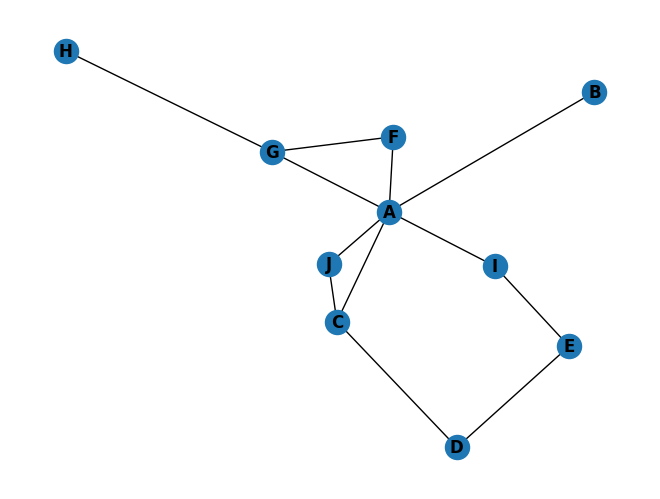

In [43]:
import matplotlib.pyplot as plt


nx.draw(G, with_labels=True, font_weight='bold')

In [59]:
import math

def euclidean_distance(u, v):
    u_coords = (G.nodes[u]['latitude'], G.nodes[u]['longitude'])
    v_coords = (G.nodes[v]['latitude'], G.nodes[v]['longitude'])
    return math.sqrt((u_coords[0] - v_coords[0])**2 + (u_coords[1] - v_coords[1])**2)

# Agora, adicionando os pesos com base nas distâncias euclidianas
for u, v in G.edges:
    G.edges[u, v]['weight'] = euclidean_distance(u, v)
    


In [66]:
shortest_path = nx.shortest_path(G, source="A", target="E", weight="weight")

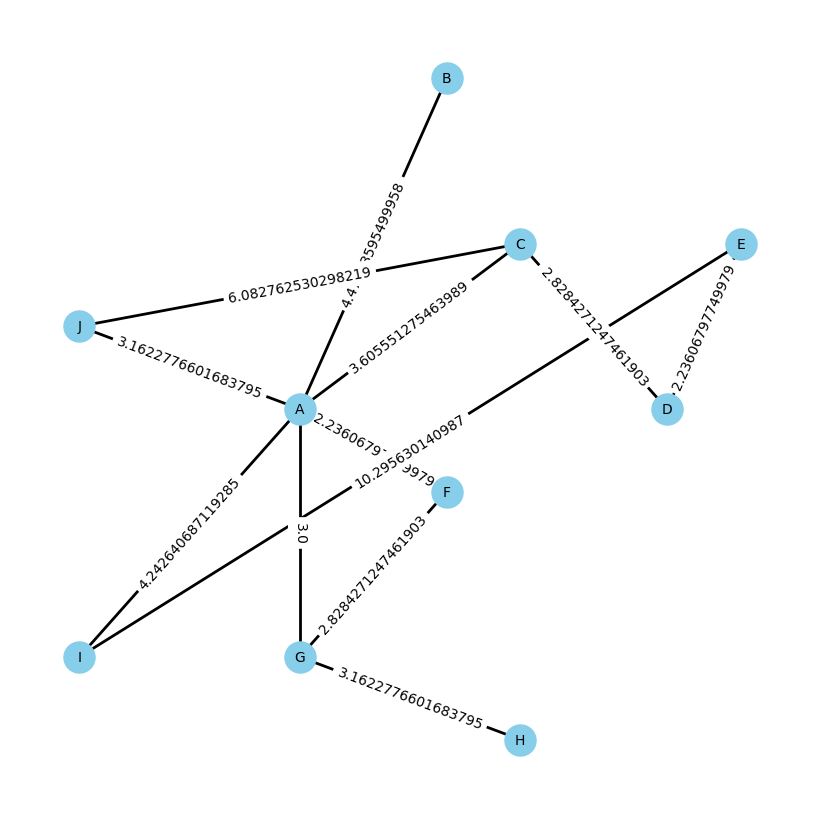

In [64]:
# Calculate node positions based on latitude and longitude
node_positions = {node: (G.nodes[node]['longitude'], G.nodes[node]['latitude']) for node in G.nodes()}

# Plotting the graph with edges scaled according to real distances
plt.figure(figsize=(8, 8))
nx.draw(G, pos=node_positions, with_labels=True, node_size=500, node_color="skyblue", font_size=10, width=2)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=edge_labels)
plt.show()

In [82]:
def find_all_paths(graph, start, end, max_nodes=None):
    all_paths = []
    if max_nodes:
        for path in nx.all_simple_paths(graph, source=start, target=end):
            if len(path) <= max_nodes + 1:  # +1 para incluir o nó de destino
                all_paths.append(path)
    else:
        all_paths = list(nx.all_simple_paths(graph, source=start, target=end))
    return all_paths


In [86]:
find_all_paths(G, "A", "E", max_nodes=2)

[['A', 'I', 'E']]

In [81]:
list(nx.all_simple_paths(G, source="A", target="E"))

[['A', 'C', 'D', 'E'], ['A', 'J', 'C', 'D', 'E'], ['A', 'I', 'E']]

In [ ]:
def find_all_paths(graph, start, end, max_nodes=None):
    all_paths = []
    if max_nodes:
        for path in nx.all_simple_paths(graph, source=start, target=end):
            if len(path) <= max_nodes + 1:  # +1 para incluir o nó de destino
                all_paths.append(path)
    else:
        all_paths = list(nx.all_simple_paths(graph, source=start, target=end))
    return all_paths

In [73]:
G["A"]

AtlasView({'B': {'weight': 4.47213595499958}, 'C': {'weight': 3.605551275463989}, 'J': {'weight': 3.1622776601683795}, 'F': {'weight': 2.23606797749979}, 'G': {'weight': 3.0}, 'I': {'weight': 4.242640687119285}})

In [69]:
# Capturando todas as rotas possiveis entre dois pontos
all_paths = nx.all_simple_paths(G, source="A", target="E")

In [70]:
all_paths

<generator object _all_simple_paths_graph at 0x72ddf98355a0>

In [32]:
# Caminhos possiveis de B para H
print(nx.shortest_path(G, "B", "H"))


['B', 'A', 'G', 'H']


In [11]:
G.edges()

EdgeView([('A', 'B'), ('A', 'C'), ('A', 'J'), ('A', 'F'), ('A', 'G'), ('A', 'I'), ('C', 'J'), ('C', 'D'), ('F', 'G'), ('G', 'H'), ('I', 'E'), ('D', 'E')])